## Importation des librairies

In [1]:
# Importation des librairias
import os
import pandas as pd
import seaborn as sns
import missingno as msno
from dotenv import load_dotenv
import matplotlib.pyplot as plt

## Importation du jeu des données

In [2]:
# Importation de la base de données
dataset_path = os.getenv("DATASET_PATH")
data = pd.read_excel(dataset_path)

# Affichage les données
print("Jeu de données importé ✅✅")

Jeu de données importé ✅✅


## Affichage des valeurs manquantes

<Axes: >

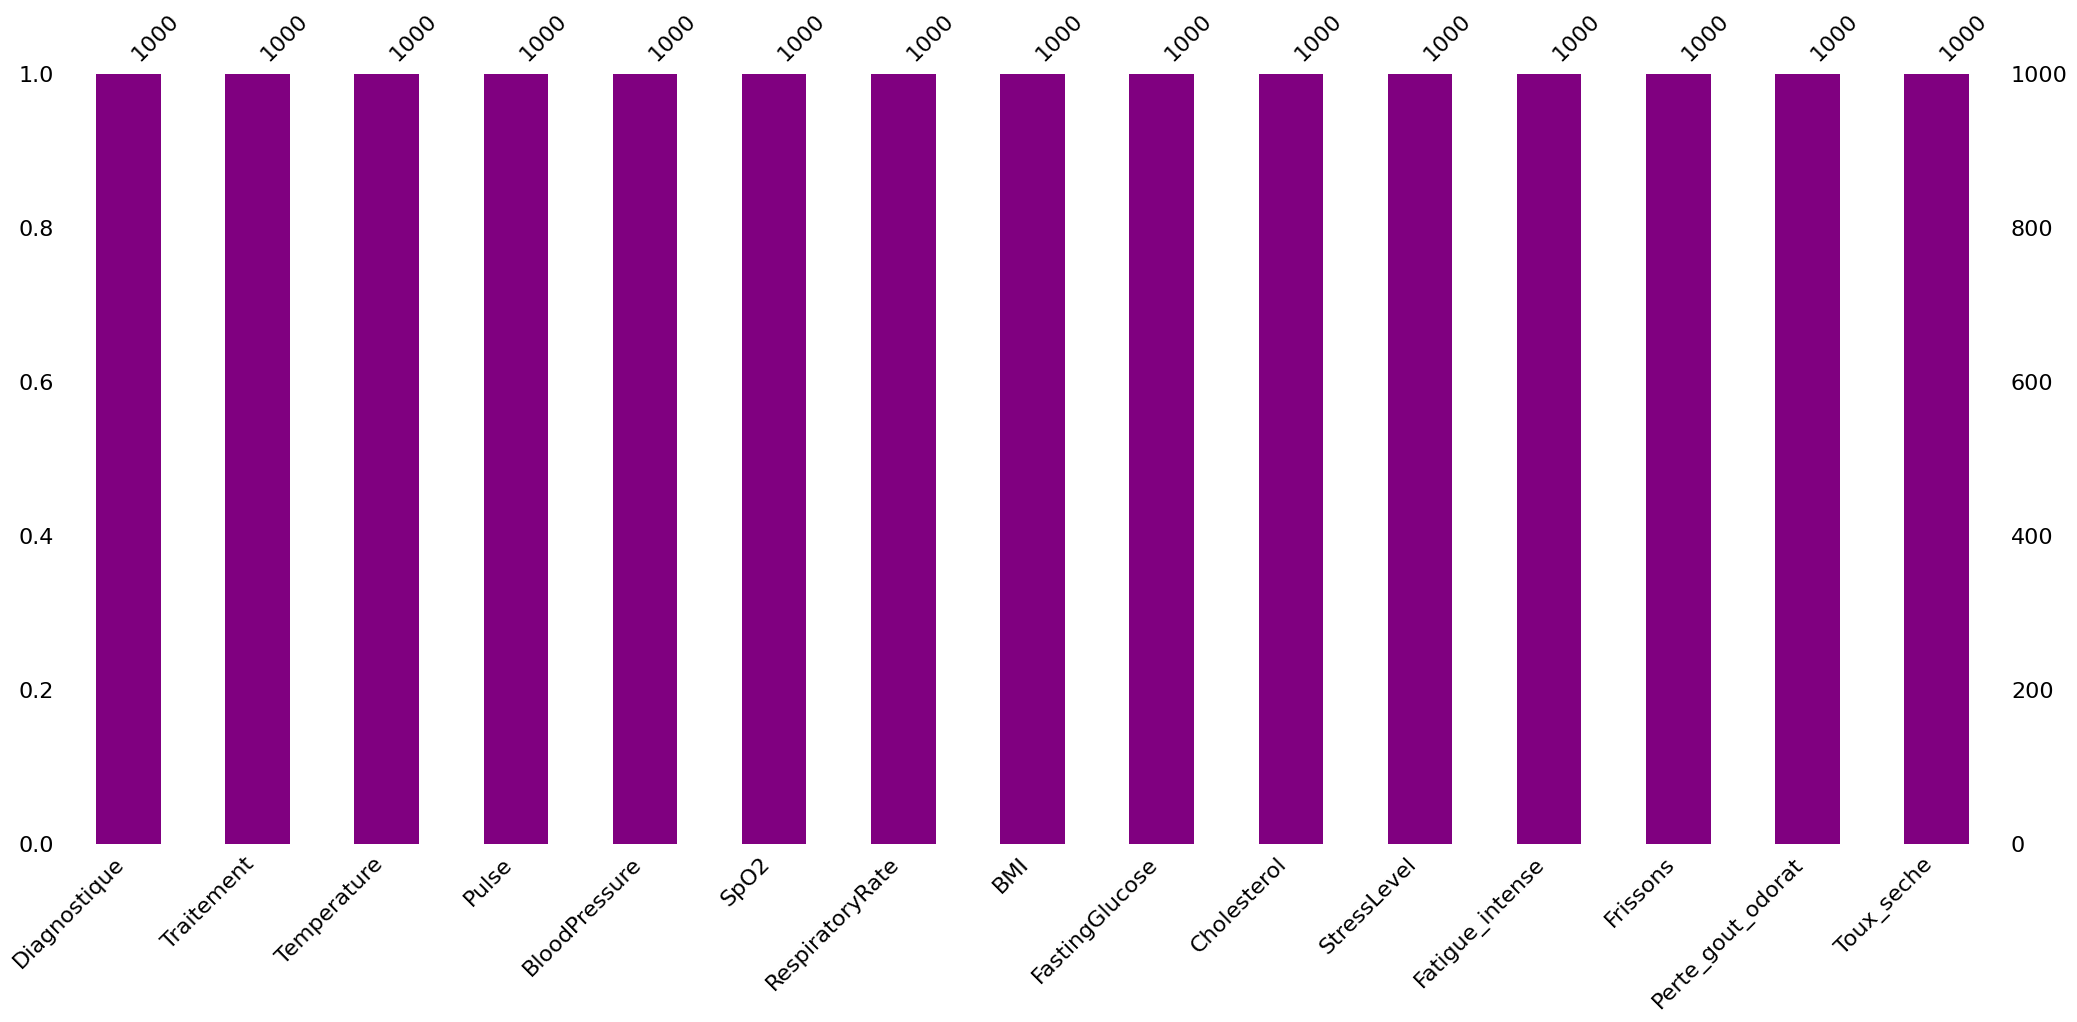

In [3]:
msno.bar(data, color="purple")

## Affichage des doublons

In [4]:
doublon = data.duplicated().sum()
if doublon == 0:
    print('✅✅ Pas de doublons')
else:
    print(f"🧐🧐 Doublons détectés : {doublon} lignes en double")

✅✅ Pas de doublons


## Séparation des colonnes

In [8]:
features = data.drop(columns=['Traitement', 'Diagnostique'])
num_col = data.select_dtypes(include=["float64"]).columns.tolist()
cat_col = data.select_dtypes(include=["object"]).columns.tolist()
target = data["Diagnostique"]

## Analyse univariée

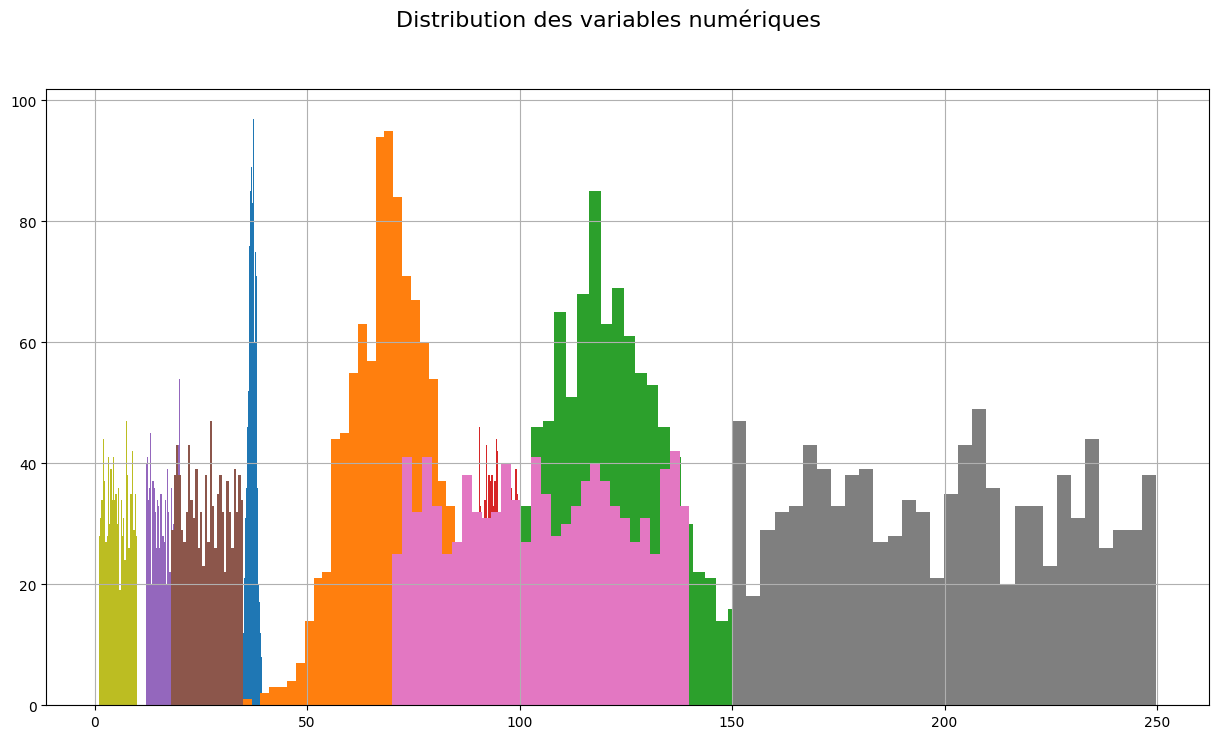

In [13]:
for col in num_col:
    data[col].hist(bins=30, figsize=(15, 8))
    plt.suptitle("Distribution des variables numériques", fontsize=16)
    plt.show

## Distribution des variables catégorielles

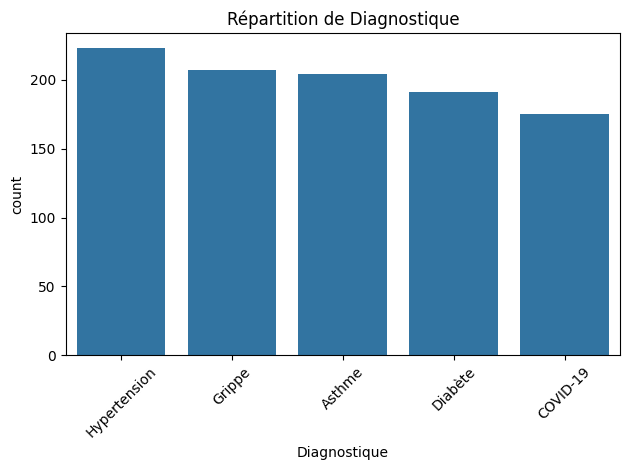

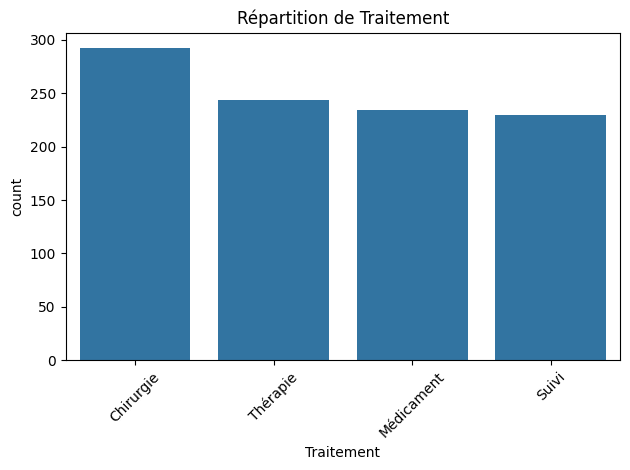

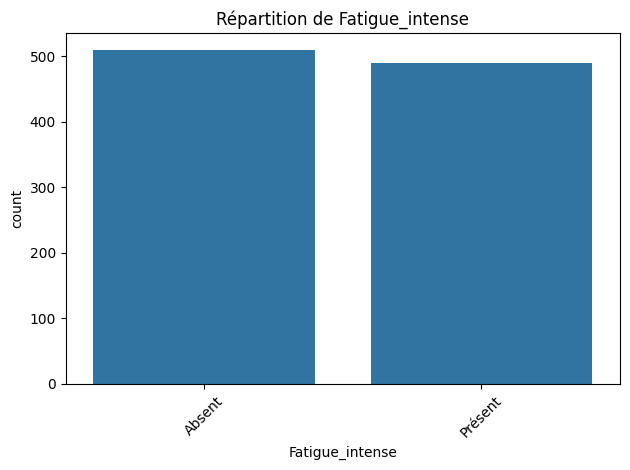

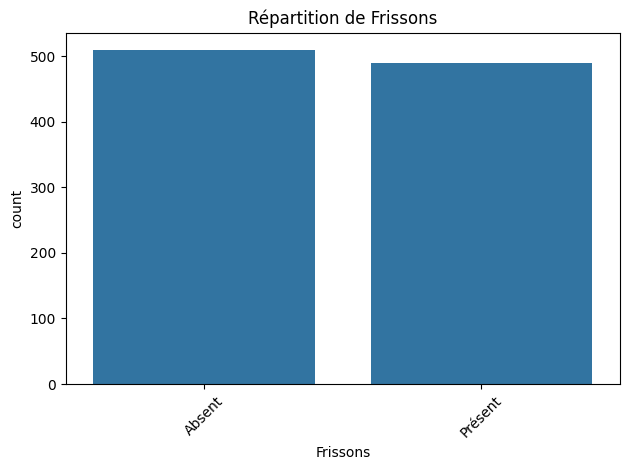

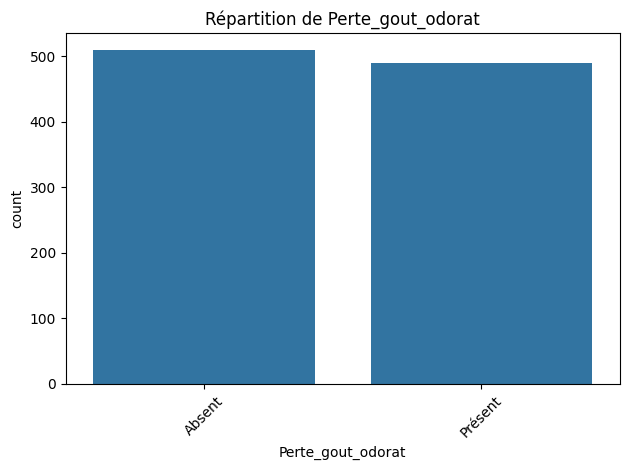

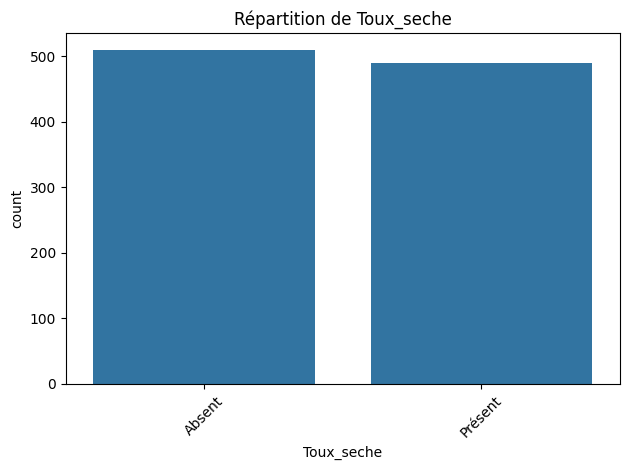

In [14]:
for col in cat_col: 
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Répartition de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Analyse bivariée

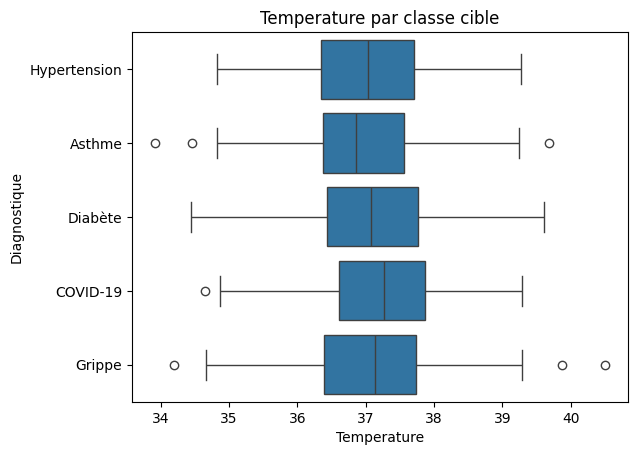

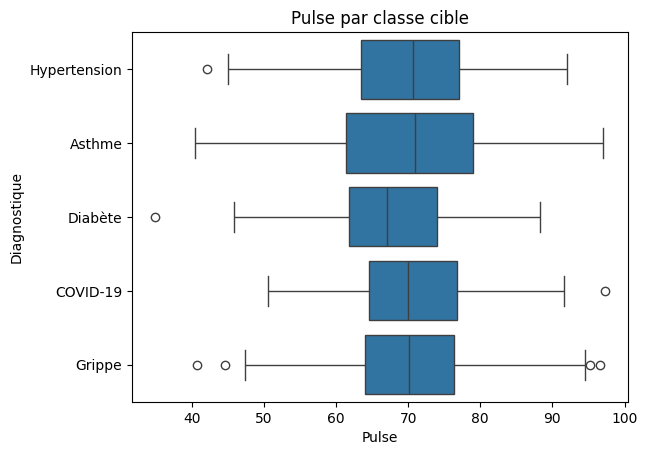

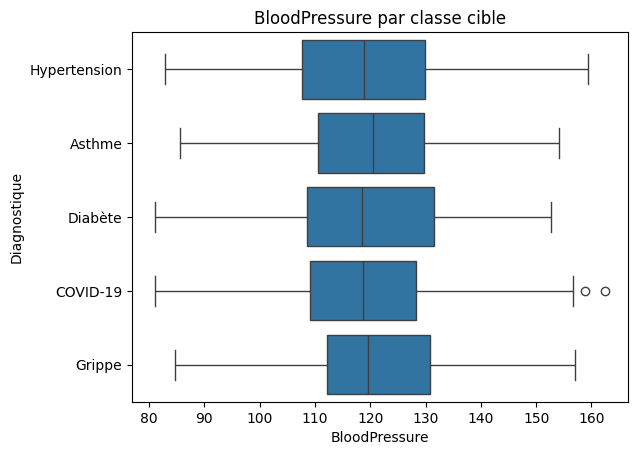

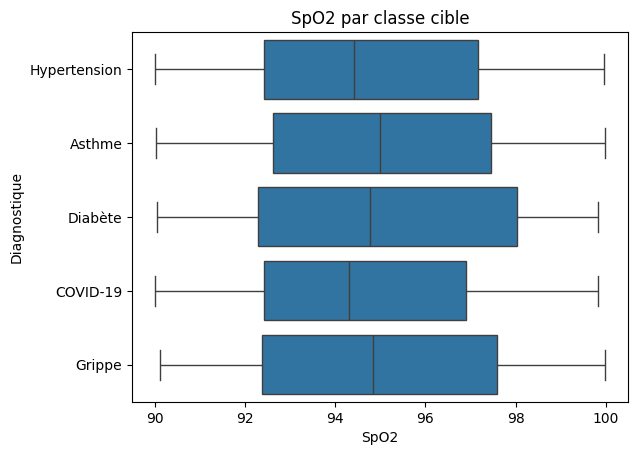

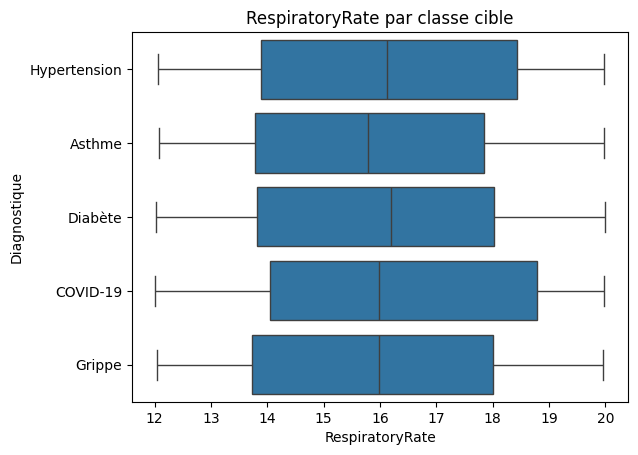

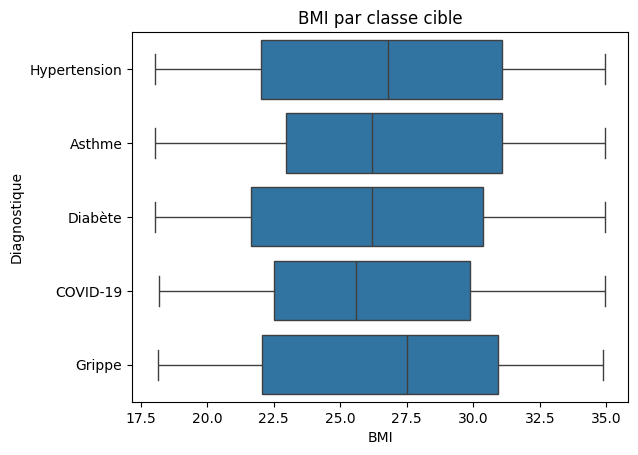

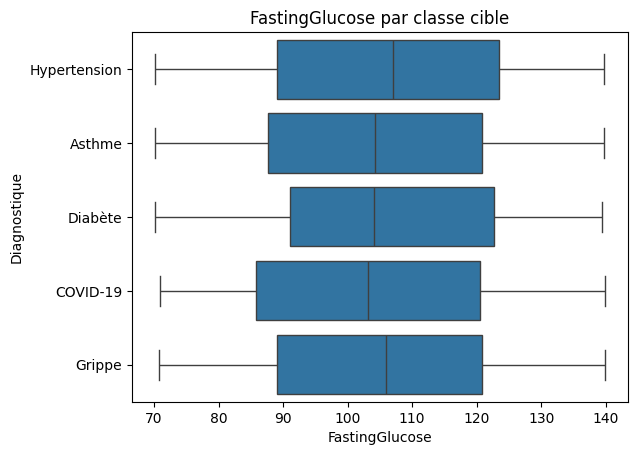

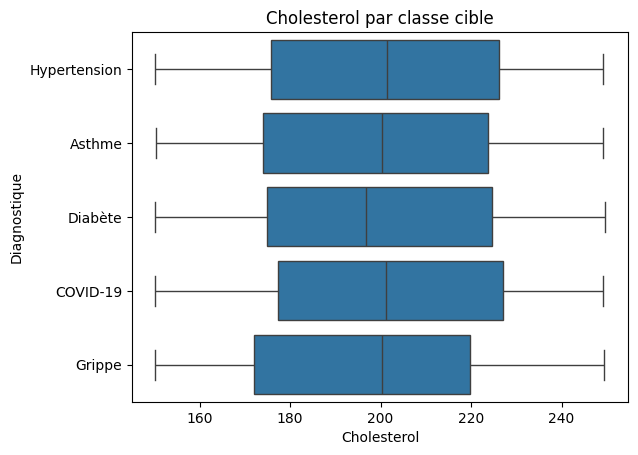

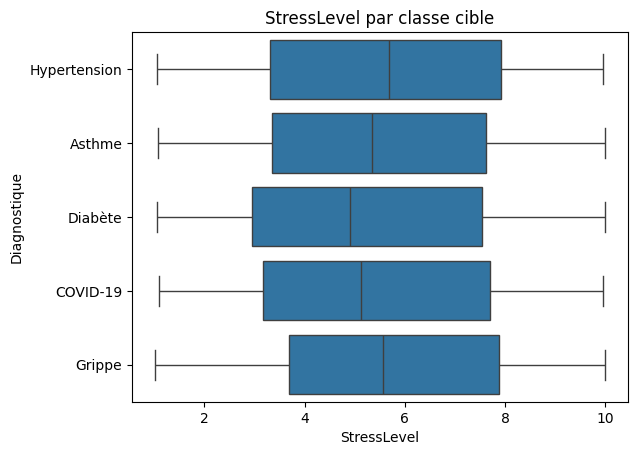

In [15]:
for col in num_col:
    sns.boxplot(data, x=col, y=target)
    plt.title(f"{col} par classe cible")
    plt.show()

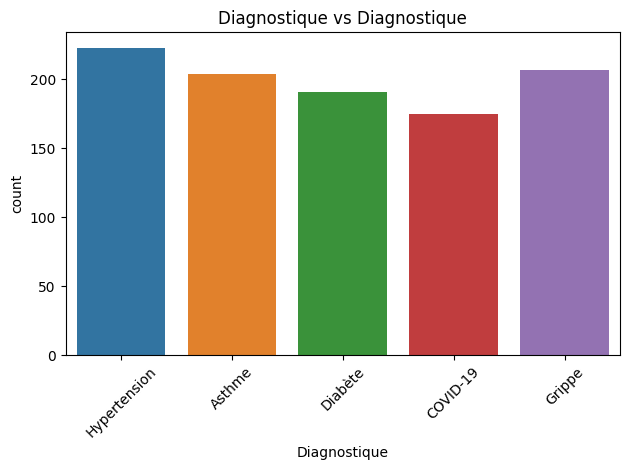

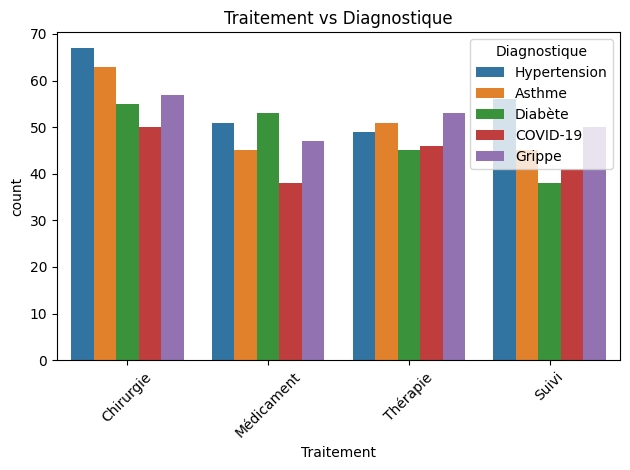

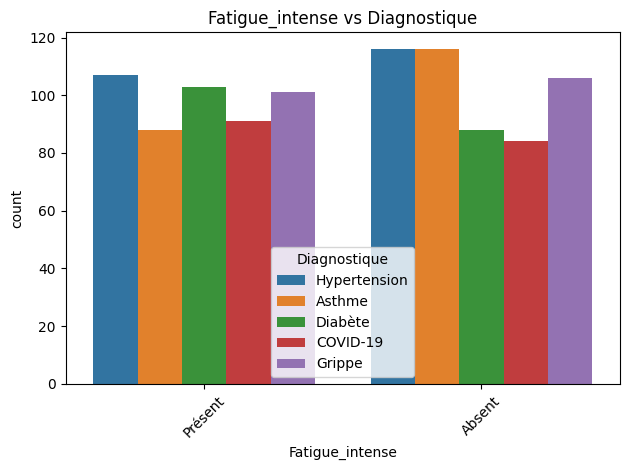

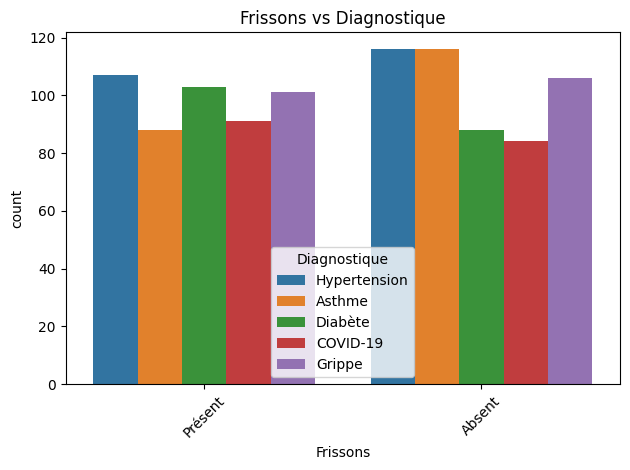

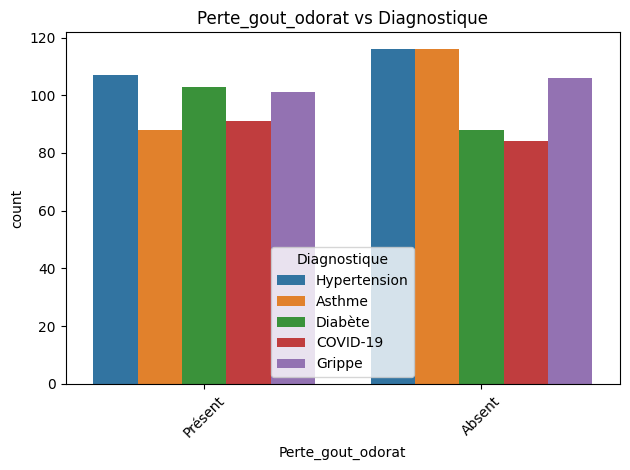

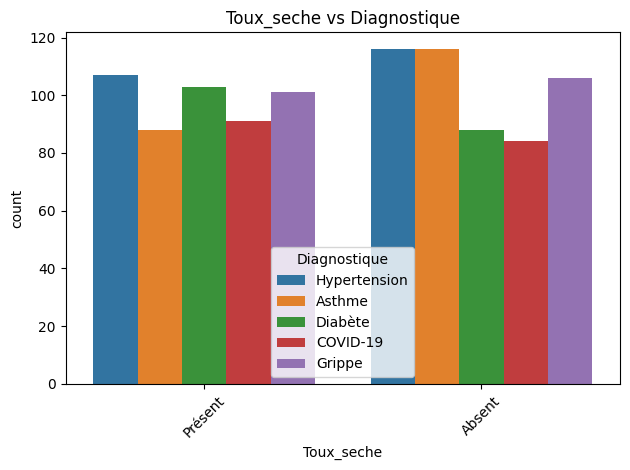

In [16]:
for col in cat_col:
    sns.countplot(data, x=col, hue=target)
    plt.title(f"{col} vs Diagnostique")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Carte à chaleur

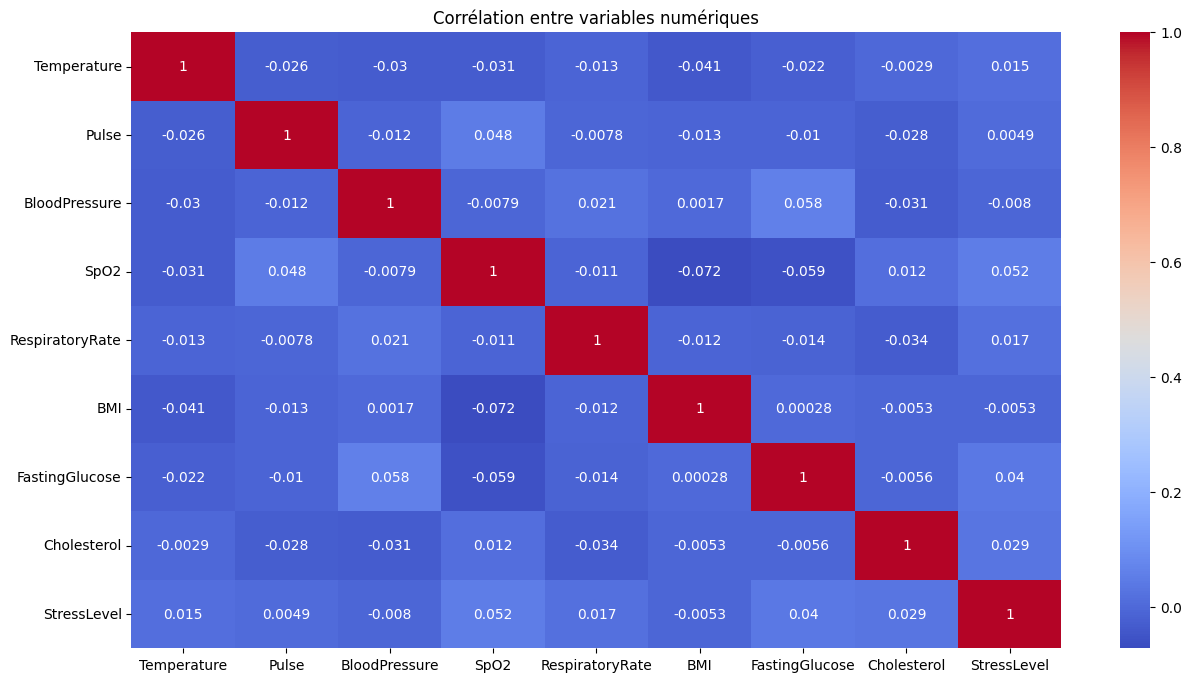

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(data[num_col].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre variables numériques")
plt.show()

## Visualisation des données

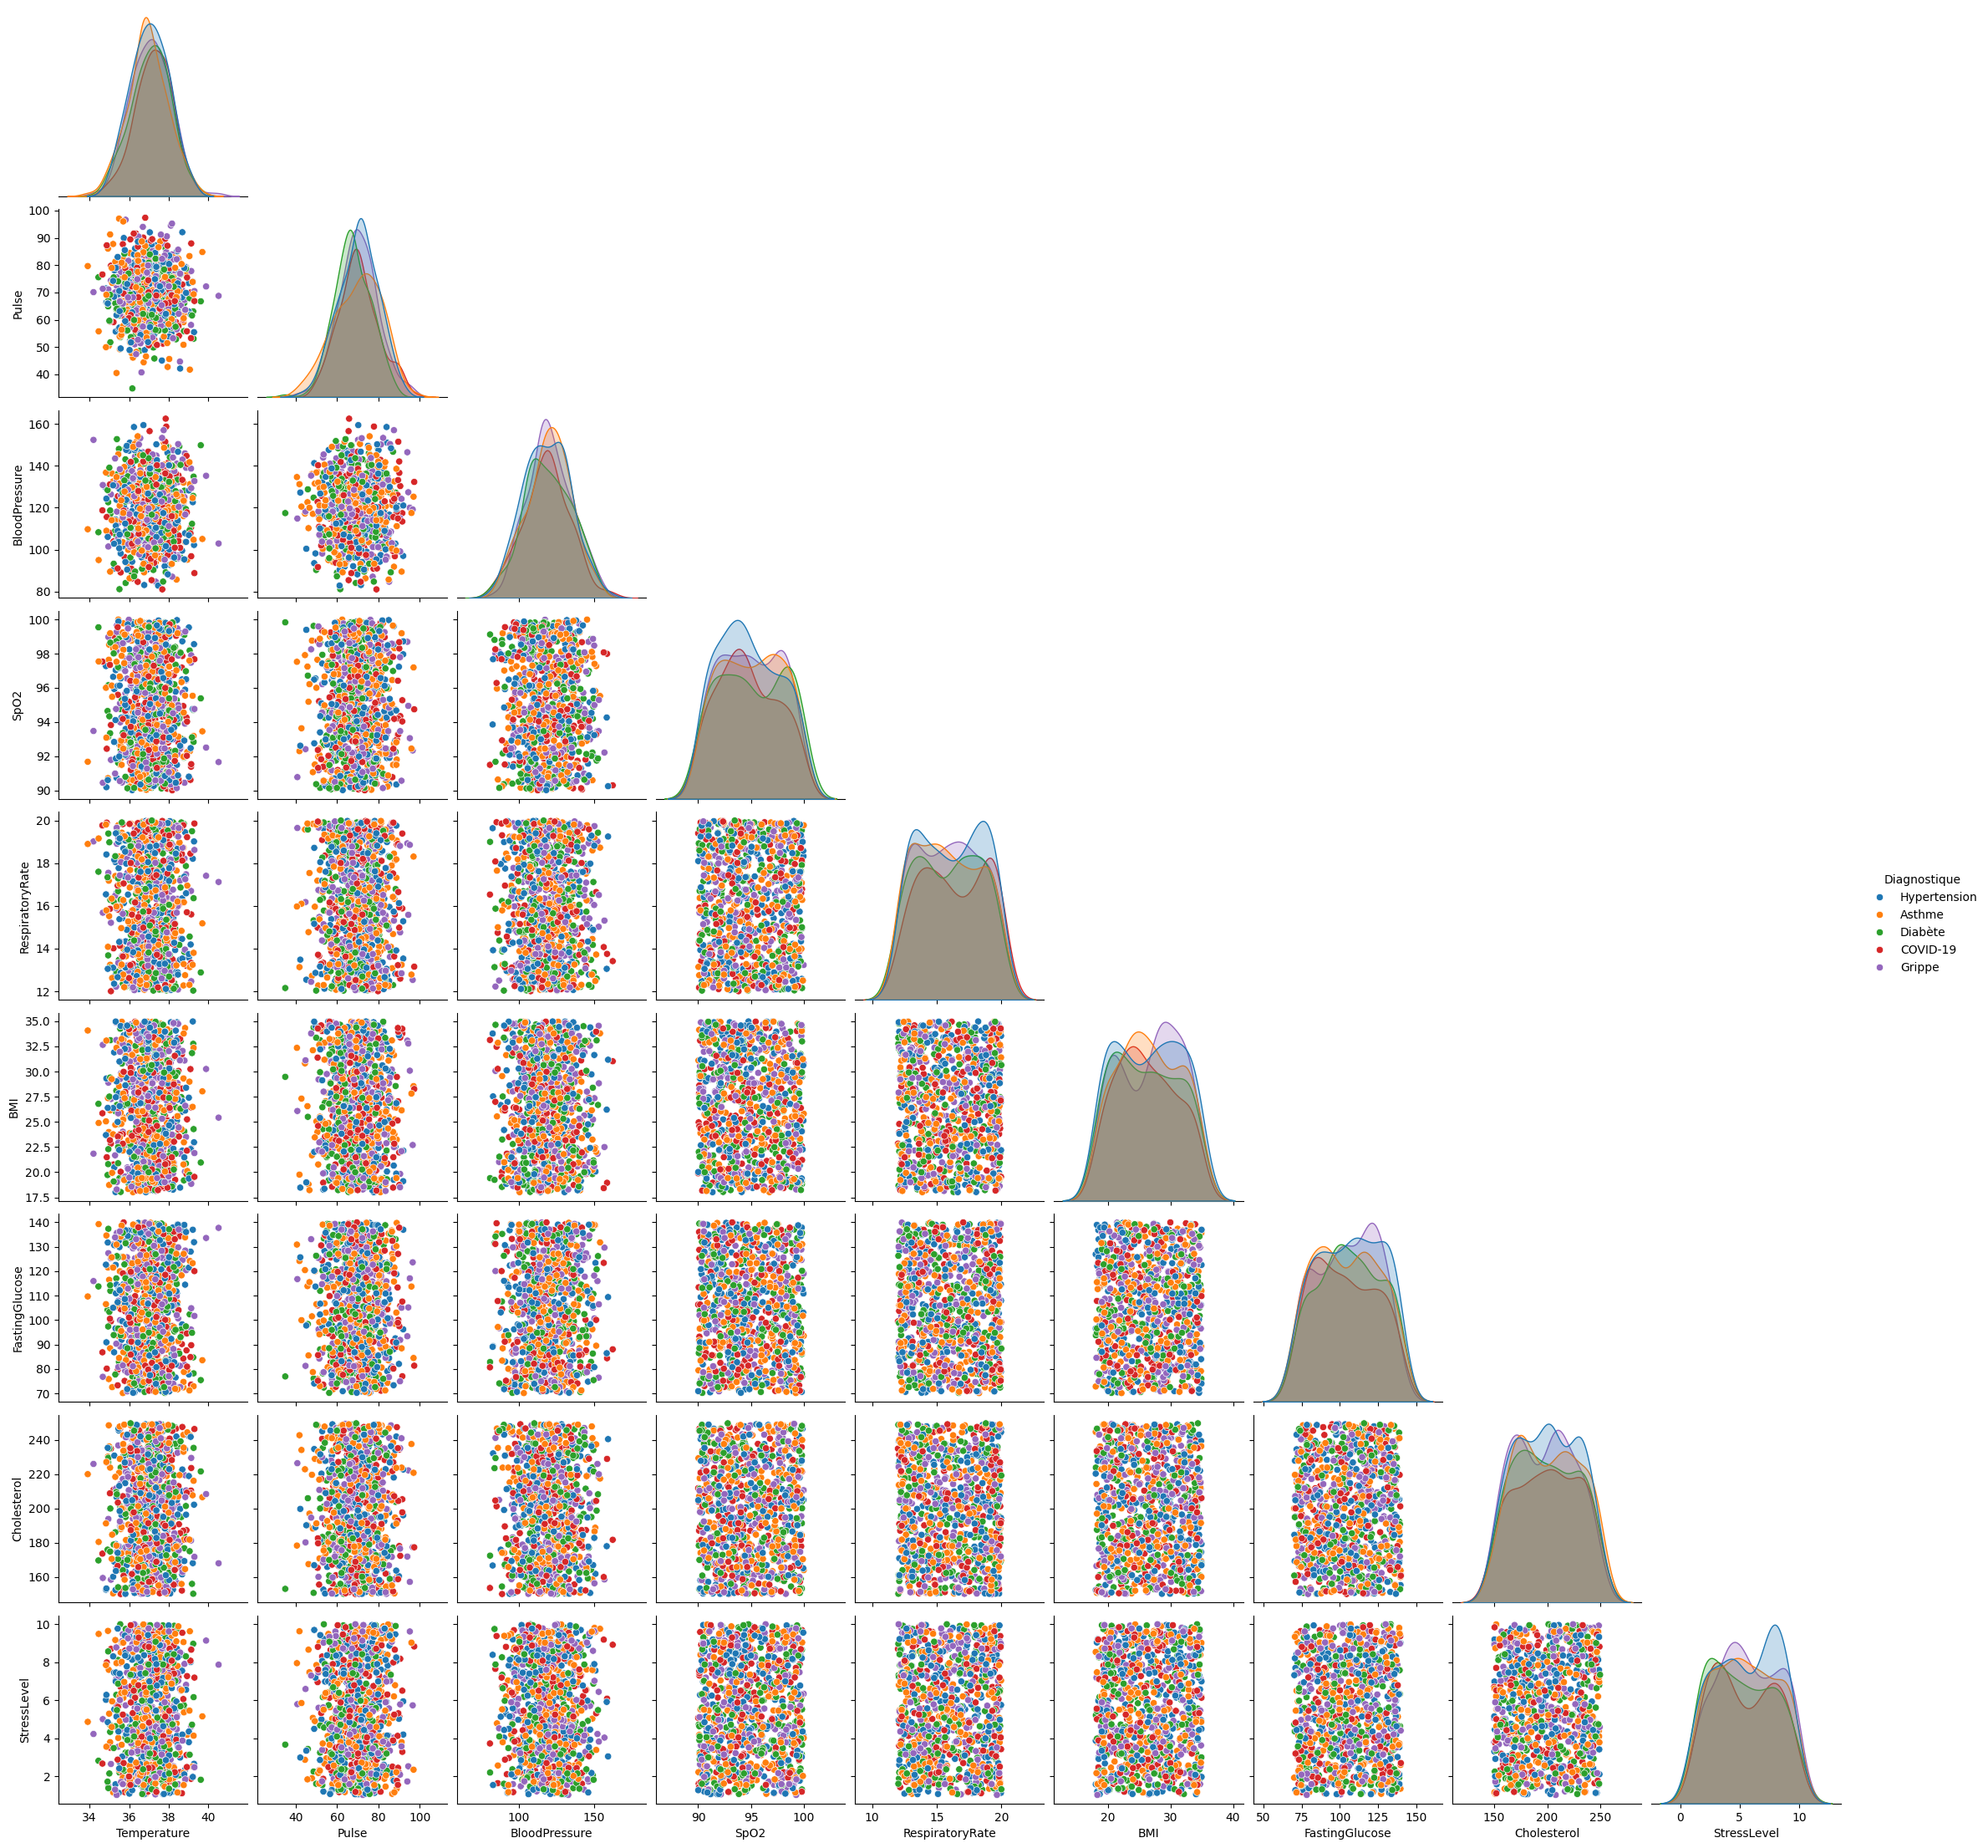

In [20]:
sns.pairplot(data, hue="Diagnostique", diag_kind='kde',corner=True)
plt.show()